In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [391]:
df = pd.read_csv("city_united.csv")
df.head()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30


In [392]:
df.drop_duplicates()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,India,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,Indonesia,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,Nigeria,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,Philippines,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [393]:
X = df.drop(["Quality of Life Index"], axis=1)
y = df[["Quality of Life Index"]]

In [394]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [395]:
df.info() #пропусков в данных пока не видно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

In [396]:
df.isna().sum() 

UA_Name                  0
UA_Country               0
UA_Continent             0
Housing                  0
Cost of Living           0
Startups                 0
Venture Capital          0
Travel Connectivity      0
Commute                  0
Business Freedom         0
Safety                   0
Healthcare               0
Education                0
Environmental Quality    0
Economy                  0
Taxation                 0
Internet Access          0
Leisure & Culture        0
Tolerance                0
Outdoors                 0
Quality of Life Index    0
dtype: int64

Непонятных подозрительных данных в датафрейме (например, заполнено много значений одним числом) я тоже не заметила 

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

Закодируем категориальные признаки

In [398]:
numerical = ['Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education', 'Environmental Quality', 'Economy', 'Taxation', 'Internet Access', 'Leisure & Culture', 'Tolerance', 'Outdoors']
categorial = ['UA_Name', 'UA_Country', 'UA_Continent']

In [399]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_X[categorial])

#сначала данные train
features_name = enc.get_feature_names_out(categorial)
train_X[features_name]= enc.transform(train_X[categorial]).toarray()
train_X = train_X.drop(categorial, axis=1)
#теперь данные test
test_X[features_name]= enc.transform(test_X[categorial]).toarray()
test_X = test_X.drop(categorial, axis=1)

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [400]:
train_X

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,...,UA_Country_ Vietnam,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
67,6.7295,5.522,4.6240,2.392,1.9020,5.09725,8.966000,7.1175,8.269000,5.9480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
65,7.1560,5.595,4.9610,3.646,2.0775,4.42125,8.671000,3.6370,6.755667,4.6185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
114,8.6310,6.301,3.4070,0.000,1.6060,5.49125,7.438667,8.1025,6.758667,2.4750,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
104,6.4555,5.049,5.7695,4.908,6.3975,4.72800,8.992000,6.7725,8.519000,5.6520,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120,1.0000,3.940,10.0000,9.859,9.4025,5.39550,8.992000,7.2435,8.018000,9.0270,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4.9100,4.370,7.3265,9.160,3.3450,4.99425,6.790000,8.0065,8.338000,3.7665,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,6.2520,5.125,3.5405,3.017,4.8075,6.03175,8.836667,9.1070,8.559333,5.0805,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
92,2.1315,6.183,2.6875,0.000,2.6425,4.61625,7.408333,9.4860,7.433667,1.4335,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
179,4.9025,9.820,3.0535,0.000,1.3235,4.54425,1.000000,5.2210,4.178333,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Посмотрим качество модели

In [401]:
reg = LinearRegression().fit(train_X, train_y)
predictions = reg.predict(test_X)
print(f'MSE: {mean_squared_error(predictions, test_y)}')
print('R2 Score:', r2_score(predictions, test_y))

MSE: 3.0286172287920915e+26
R2 Score: -0.05353929536103519


In [402]:
reg.score(train_X, train_y)

0.9866773273021906

In [403]:
reg.score(test_X, test_y)

-2.4090514968691687e+23

Качество модели плохое, нужно что-то с этим делать

Попробуем добавить полиномиальные признаки, а потом посмотрим сколько всего их получилось и вероятнее всего придется убрать часть

In [404]:
poly = PolynomialFeatures(2)
train_X = pd.DataFrame(poly.fit_transform(train_X), columns=poly.get_feature_names_out(train_X.columns))
test_X = pd.DataFrame(poly.transform(test_X), columns=poly.get_feature_names_out())

In [405]:
train_X

,1,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,...,UA_Continent_Europe^2,UA_Continent_Europe UA_Continent_North America,UA_Continent_Europe UA_Continent_Oceania,UA_Continent_Europe UA_Continent_South America,UA_Continent_North America^2,UA_Continent_North America UA_Continent_Oceania,UA_Continent_North America UA_Continent_South America,UA_Continent_Oceania^2,UA_Continent_Oceania UA_Continent_South America,UA_Continent_South America^2
0,1.0,6.7295,5.522,4.6240,2.392,1.9020,5.09725,8.966000,7.1175,8.269000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,7.1560,5.595,4.9610,3.646,2.0775,4.42125,8.671000,3.6370,6.755667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,8.6310,6.301,3.4070,0.000,1.6060,5.49125,7.438667,8.1025,6.758667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,6.4555,5.049,5.7695,4.908,6.3975,4.72800,8.992000,6.7725,8.519000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0000,3.940,10.0000,9.859,9.4025,5.39550,8.992000,7.2435,8.018000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.0,4.9100,4.370,7.3265,9.160,3.3450,4.99425,6.790000,8.0065,8.338000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,1.0,6.2520,5.125,3.5405,3.017,4.8075,6.03175,8.836667,9.1070,8.559333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,1.0,2.1315,6.183,2.6875,0.000,2.6425,4.61625,7.408333,9.4860,7.433667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,1.0,4.9025,9.820,3.0535,0.000,1.3235,4.54425,1.000000,5.2210,4.178333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Получилось очень много признаков, часть их них нужно убирать. Сначала попробуем F-тест

Методом перебора я пришла к такому k, при котором получается лучшее качество модели

In [278]:
from sklearn.feature_selection import f_regression, SelectKBest
f_statistic, p_values = f_regression(train_X, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [279]:
selector = SelectKBest(f_regression, k=10)
train_X = pd.DataFrame(selector.fit_transform(train_X, train_y), columns = selector.get_feature_names_out())
test_X = pd.DataFrame(selector.transform(test_X), columns = selector.get_feature_names_out())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Смотрим результаты

In [280]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
#scaler.fit_transform(train_X)
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [281]:
reg = LinearRegression().fit(train_X, train_y)
predictions = reg.predict(test_X)
print(f'MSE: {mean_squared_error(test_y, predictions)}')
print('R2 Score:', r2_score(test_y, predictions))

MSE: 222.7096069526719
R2 Score: 0.822850208043471


In [282]:
reg.score(train_X, train_y)

0.807156309142693

In [283]:
reg.score(test_X, test_y)

0.822850208043471

Получились хорошие результаты по модели

### Попробуем значение Шепли

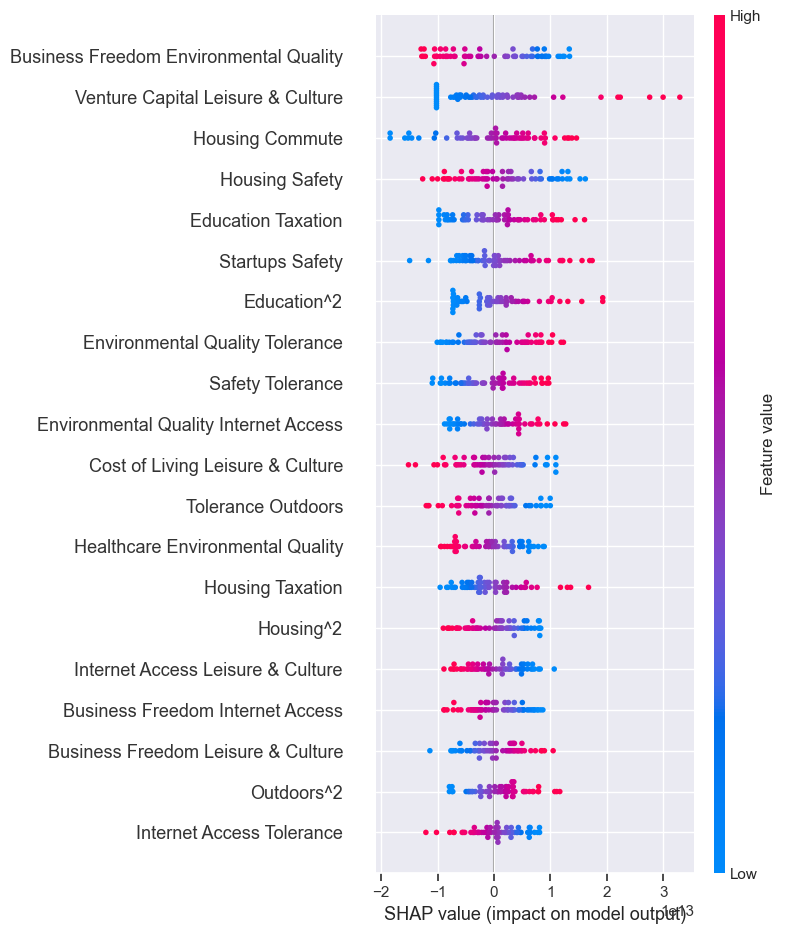

In [296]:
reg = LinearRegression().fit(train_X, train_y)
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)
shap.summary_plot(shap_values, test_X)

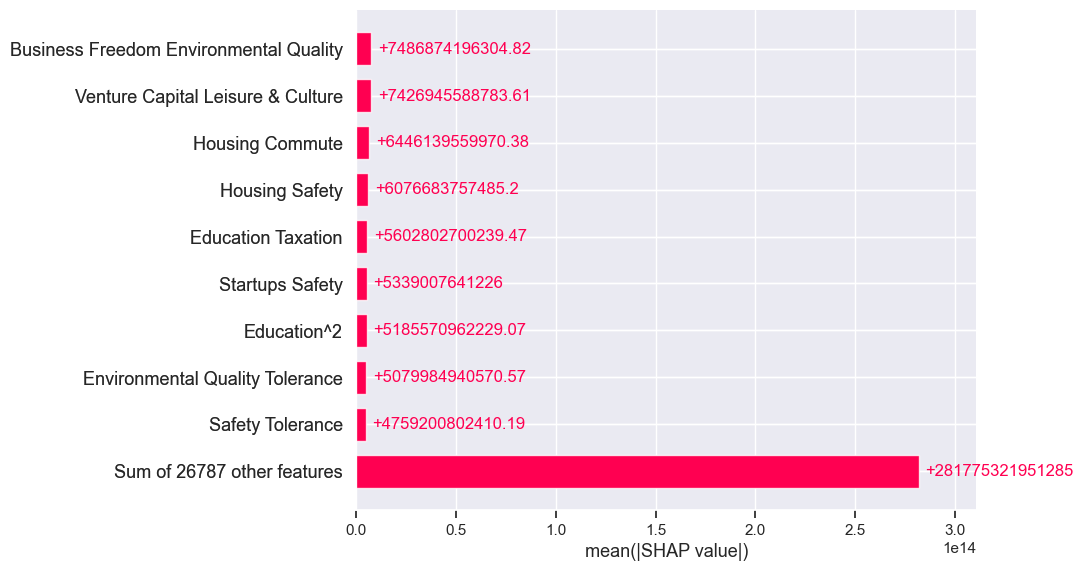

In [297]:
shap.plots.bar(shap_values)

In [298]:
test_X = test_X[['Business Freedom Environmental Quality', 'Venture Capital Leisure & Culture', 'Housing Commute', 'Housing Safety', 'Education Taxation', 'Startups Safety', 'Education^2', 'Environmental Quality Tolerance', 'Safety Tolerance']]

In [299]:
train_X = train_X[['Business Freedom Environmental Quality', 'Venture Capital Leisure & Culture', 'Housing Commute', 'Housing Safety', 'Education Taxation', 'Startups Safety', 'Education^2', 'Environmental Quality Tolerance', 'Safety Tolerance']]

In [300]:
reg = LinearRegression().fit(train_X, train_y)

In [301]:
reg.score(train_X, train_y)

0.7876320334107766

In [302]:
reg.score(test_X, test_y)

0.7754500884970784

In [303]:
mean_squared_error(reg.predict(train_X), train_y)

262.24396026340776

In [304]:
mean_squared_error(reg.predict(test_X), test_y)

282.3002047010295

In [305]:
print('R2 Score:', r2_score(test_y, reg.predict(test_X)))

R2 Score: 0.7754500884970784


В целом, с помощью значения Шепли тест показал хороший результат, чуть хуже чем по F-тесту (но F-тест более наивный метод)

### Попробуем метод PCA

In [307]:
from sklearn.decomposition import PCA

In [350]:
scaler = StandardScaler()

In [371]:
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [352]:
pca = PCA(n_components=50, whiten=True)

In [353]:
pca = pca.fit(train_X)

In [354]:
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

In [355]:
model = LinearRegression()
model.fit(train_X, train_y)
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

R2 на train: 0.857652851065452
R2 на test: 0.6984892730538896


Попробуем на меньшем n_compoments

In [406]:
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
pca = PCA(n_components=10, whiten=True)
pca = pca.fit(train_X)
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

In [407]:
model = LinearRegression()
model.fit(train_X, train_y)
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

R2 на train: 0.7874344125226419
R2 на test: 0.6845198302162292


В целом самые лучшее качество показали F-тест и значение Шепли